<a href="https://colab.research.google.com/github/kappakpr/DeepLearning/blob/master/senti2_GBM_H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [2]:
!pip install h2o==3.30.0.1
#can also install without specifying the version, pip will install the latest version available

     |████████████████████████████████| 129.5MB 84kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.1-py2.py3-none-any.whl size=129557718 sha256=e7fa9f12bcfe0604f54b8ef100009e054e3bd2f614801a8fede397a12b504303
  Stored in directory: /root/.cache/pip/wheels/db/42/63/d118d7218432054da842f5d10bd4f99e978bde0931164e6c7a
Successfully built h2o


In [3]:
import tensorflow_datasets as tfds
import h2o
import numpy as np

In [4]:
h2o.init()
#started the h2o cluster.
#gpu cluster is nto required

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp89gzhqz8
  JVM stdout: /tmp/tmp89gzhqz8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp89gzhqz8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,3 months and 19 days !!!
H2O_cluster_name:,H2O_from_python_unknownUser_3uh28s
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


h2o is more efficient than the scikitlearn 

https://www.quora.com/Why-would-one-use-H2O-ai-over-scikit-learn-machine-learning-tool
https://www.quora.com/Why-would-one-use-H2O-ai-over-scikit-learn-machine-learning-tool

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
dataset, info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00',with_info=True,batch_size=-1,data_dir='/content/drive/My Drive/colabfiles')
train_dataset=dataset['train']

Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /content/drive/My Drive/colabfiles/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0.incompleteC5O6LB/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /content/drive/My Drive/colabfiles/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0. Subsequent calls will reuse this data.


In [6]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [7]:
dataset=tfds.as_numpy(train_dataset)

In [8]:
dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [9]:
helpful_votes = dataset['data']['helpful_votes']
review_headline = dataset['data']['review_headline']
review_body = dataset['data']['review_body']
rating = dataset['data']['star_rating']

In [10]:
h2o_df = h2o.H2OFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_body[:,None],rating[:,None])),column_names=['votes','headline','reviews','rating'],column_types=['numeric','string','string','numeric'])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
h2o_df

votes,headline,reviews,rating
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4
3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5
0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4
0,b'Five Stars',b'Top quality.',5
1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance AlkaMAX alkaline booster liquid unflavored (formally TriMedica) a glass brown bottle with eye dropper.<br />Supplement Facts; Serving Size: 10 Drops (Approx. 0.5 mL). Servings per Container: Approx. 60<br />Amount Per Serving % Daily Value<br />Magnesium (as Magnesium Chloride) 40 mg 10%<br />Chloride (as Magnesium Chloride) 64 mg 2%<br />Other Ingredients: Deionized water and trace mineral complex.<br />Directions: Add 10 drops to 8 oz. of water or other beverage daily as needed or as directed by your health care practitioner. Store in a cool, dry place.<br /><br />I have not used product as of yet with changed ingredients of original/as shown in AlkaMax alkaline support white squeeze bottle.<br />but had to rate to post...heck this new may be better for all I know.'",3
6,b'Seems to work well!',"b'I recently picked this unit up at Bed and Bath where it was $99.00. With a 20% coupon the price was $80 (so comparison shop!) It\'s easy to use and seems to work well. I agree with other reviewers about the noise level (loud like a tea kettle boiling), but I use this unit in the living room area so sleeping is not an issue. Having the 2 separate water reservoirs to fill is much easier, weight-wise, as I previously had another humidifier which had one large water reservoir and it was very heavy when full. The unit comes apart quite easily for cleaning and since frequent cleaning is recommended (I usually do it 1x per week, not daily) this is a definite plus. Additionally, one only needs to use vinegar to clean the inside reservoir, which is a lot cheaper than having to buy some kind of \\\\""special\\\\"" cleaning solution. My one complaint is that it doesn\'t, but should, have an automatic shut off when both tanks are empty.I have to remember to turn the unit off when I leave the house. My previous humidifiers all had this auto turn off; seems like every humidifier should.'",4
8,b'deep heat?????',"b'Not sure what previous reviewer was talking about. The product uses ULTRASOUND waves for pain relief NOT heat. After repeated use, the pain in my knee and shoulder was feeling great. I think you should re-read the description and reconsider your opinion. Great product sold by a great company.'",5
2,b'Thermometer for a toddler',"b""The shippers were great....willing to consider speedier shipping options, but in the end the standard shipping arrived quickly enough. The 

In [12]:
h2o_df["target"] = (h2o_df["rating"] >= 4).ifelse("1","0")

In [13]:
h2o_df.shape

(85981, 5)

In [14]:
h2o_df["target"].table()
# from output we can see it is an imbalanced dataset positive vs negative wise

target,Count
0,23427
1,62554


In [15]:
h2o_df.describe()

Rows:85981
Cols:5




,votes,headline,reviews,rating,target
type,int,string,string,int,enum
mins,0.0,NaN,NaN,1.0,
mean,3.3494841883672,NaN,NaN,3.977401984159291,
maxs,2785.0,NaN,NaN,5.0,
sigma,19.483167220712946,NaN,NaN,1.433130291971473,
zeros,44555,0,0,0,
missing,0,0,0,0,0
0,0.0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4.0,1
1,3.0,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5.0,1
2,0.0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4.0,1


In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def tokenize(line):
  tokenized = line.tokenize("\\W+")
  tokenized = tokenized.tolower()
  tokenized = tokenized[(tokenized.nchar() >= 2) | (tokenized.isna()),:] #keep any value length of words greater than 2 ignore to , it etc. kind of words
  tokenized_filter = tokenized[(tokenized.isna()) | (~ tokenized.isin(stop_words)),:] #filter and remove if in the stop words list
  return tokenized_filter

In [18]:
words_reviews = tokenize(h2o_df["reviews"])

In [19]:
words_headline = tokenize(h2o_df["headline"])

In [20]:
words_reviews.head()

C1
glasses
excellent
value
fit
good
comfortable
legal
blindness
lot
options


In [21]:
words_headline.head()

C1
glasses
excellent
value
fit
good
""
fantastic
way
cheaply
try


In [22]:
words_reviews.shape

(2797601, 1)

In [23]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OGradientBoostingEstimator, H2OXGBoostEstimator

#word2vec model - words which share a close meaning or relation are stored closer in the vector
#better than tfidf vectors because in H2OWord2vecEstimator the context of the word is maintained

In [24]:
vec_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v_amazon.model")
vec_model.train(training_frame=words_reviews)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [25]:
h2o.save_model(vec_model,path='/content/drive/My Drive/colabfiles/',force=True)

'/content/drive/My Drive/colabfiles/w2v_amazon.model'

In [26]:
#specify the full path to model 
vec_model=h2o.load_model('/content/drive/My Drive/colabfiles/w2v_amazon.model')

In [27]:
#sanity check of model
#takes text corpus as input and produces word vector as output
vec_model.find_synonyms("perfumes",count=5)

OrderedDict([('fragrances', 0.7395473718643188),
             ('scents', 0.728407621383667),
             ('febreze', 0.7216178178787231),
             ('perfumey', 0.7166586518287659),
             ('scent', 0.7126305103302002)])

In [28]:
vec_model.find_synonyms("toothpaste",count=5)

OrderedDict([('mouthwash', 0.740286111831665),
             ('listerine', 0.7149285674095154),
             ('plax', 0.6925594210624695),
             ('paste', 0.686217188835144),
             ('ultreo', 0.6776861548423767)])

In [29]:
vec_model.find_synonyms("glasses",count=5)

OrderedDict([('sunglasses', 0.8857452869415283),
             ('readers', 0.8417409062385559),
             ('bifocals', 0.8039722442626953),
             ('lenses', 0.7840487957000732),
             ('bifocal', 0.7825195789337158)])

In [30]:
reviews_vecs = vec_model.transform(words_reviews,aggregate_method="AVERAGE")
#transform the words_reviews and transform to a vector representation as in a numeric representation that the model can understand. model cannot understand string objects
#aggregate = NONE , dont aggregate each input word is mapped to a single word vector
# average = input is treated as a sequence of words delimited by each sentence. each sentence is mapped to a vector. vector belonging to same sentence is averaged. look into more details.

In [31]:
reviews_vecs.shape

(85981, 100)

In [32]:
reviews_vecs.head()

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
0.103508,-0.0805032,-0.0603109,-0.0412945,-0.0243264,-0.193731,0.105549,0.0270617,0.0474832,-0.0206425,-0.0165391,-0.0125719,-0.0579739,-0.0434893,0.0788279,-0.0446767,0.0786619,0.0152803,-0.0775012,-0.139236,0.00608164,0.105663,0.079101,-0.00396536,0.00107114,0.00107714,-0.032905,-0.120271,0.0550841,-0.0873431,-0.00437647,0.0457385,-0.102353,0.118598,-0.0128193,-0.0159136,-0.0381627,-0.0379924,0.0459074,-0.00284195,0.0030753,-0.034452,0.0213755,0.113952,-0.233228,-0.0256249,0.175314,0.135772,0.0232937,-0.266166,0.00555355,0.0944914,0.0364996,-0.16477,-0.101347,-0.00835908,-0.166429,-0.0566899,-0.0230984,-0.0229848,-0.0114379,-0.0660845,0.0511603,-0.0132155,0.0992971,0.0471692,0.0176119,0.18936,0.0784521,-0.0650049,0.0679219,-0.153654,-0.0138886,0.122761,-0.132421,0.0109915,0.130014,-0.0325091,0.0608704,-0.0650901,0.0337777,0.0845054,0.0935574,0.0374667,-0.0383676,0.00644868,0.0596815,0.0575476,-0.192398,0.276227,-0.0780727,0.127773,0.0450793,0.229142,-0.100369,0.00167123,-0.0374238,0.184182,-0.0327172,0.0534768
-0.0574276,-0.106626,-0.0706814,-0.00530366,-0.139475,-0.110256,-0.0861033,0.0118249,-0.0319897,-0.00948084,-0.0472508,-0.0337342,0.126627,-0.142604,0.170951,-0.0572307,0.0772859,0.0487817,-0.0140949,-0.132286,-0.120454,-0.0260999,-0.0355556,0.138899,-0.0856893,-0.148429,-0.106316,-0.0680395,-0.0405813,-0.0526848,0.0108961,0.11186,-0.107902,0.157048,0.0509355,-0.0210589,-0.0739741,0.0265271,-0.0469174,-0.0207361,-0.0931629,0.0675909,0.000730257,0.139389,-0.140633,0.0397956,0.111864,-0.102877,-0.0758796,-0.120046,0.0426021,0.132194,0.0222173,-0.144823,-0.139083,0.125912,-0.176542,-0.0804075,-0.0987273,-0.0403816,-0.0349307,-0.169934,-0.00850941,0.0387835,-0.133491,0.153958,0.105952,-0.0647062,0.115235,-0.129634,-0.0050095,-0.0579823,0.0549438,0.106924,-0.0988947,-0.0353834,0.0655166,-0.196762,0.0125805,0.0775878,-0.0408199,0.0311123,0.0438745,0.125915,-0.092075,-0.0381355,0.105584,0.0723516,-0.105149,0.184986,-0.0387908,0.0907108,-0.0133455,0.128321,-0.0483428,0.143781,0.0782894,0.134124,0.0362435,0.126437
-0.0406828,-0.012706,-0.0558478,-0.0199142,-0.0228295,-0.0806033,-0.188781,-0.0429571,-0.0262156,-0.137505,-0.139385,-0.0131218,0.0116038,0.198784,0.0459996,-0.0228656,-0.0283037,0.0202299,-0.0116051,-0.133897,-0.0159179,0.025421,0.0627931,-0.0173677,-0.00134844,-0.184776,0.0360982,-0.119874,-0.00938859,-0.0160633,0.0934339,0.0964163,-0.174437,0.184208,0.0711072,-0.0165821,-0.138311,-0.181852,-0.00259431,-0.186456,-0.155647,0.00921692,-0.0847789,0.105664,-0.138338,-0.0246616,0.0071917,-0.0618084,-0.0527641,-0.141806,0.0166745,0.157917,-0.0667674,-0.143471,-0.121824,0.0109598,-0.293066,-0.185175,0.033704,-0.0905342,-0.171567,-0.0185847,0.0590673,-0.039832,0.00613753,0.119605,0.026545,-0.0395491,0.117747,-0.011804,0.0752608,-0.0613632,-0.0104467,0.0570278,-0.0243488,0.0131363,0.0515129,0.0657231,0.00651378,-0.125286,0.0954047,-0.00177321,0.10093,0.0347674,-0.0962631,-0.0853278,0.0125296,0.104107,-0.167439,0.160836,-0.0080109,0.129232,-0.0236909,0.178275,0.00990027,-0.00366844,0.130957,-0.0909388,0.112822,-0.0731427
-0.0567047,-0.068707,0.0643703,0.0038336,0.225453,-0.515567,0.0137966,0.105561,-0.0111972,-0.242452,-0.274085,-0.026472,-0.00808941,-0.0453169,0.0830491,0.0399343,-0.0386375,-0.249728,0.150318,-0.356902,-0.0871666,0.165222,0.0984669,0.0678825,-0.0880486,0.0781054,-0.0145445,-0.0257574,0.122305,-0.0531261,0.00501819,0.0441946,-0.222808,0.0442884,0.0746239,0.107991,-0.135095,-0.118012,-0.0947019,-0.129622,-0.0765845,0.0421151,-0.0369141,-0.108056,-0.383505,-0.133974,0.202681,0.0990651,-0.196124,-0.158834,-0.204139,0.26012,0.07

In [33]:
h2o_df_ext=h2o_df.cbind(reviews_vecs)

In [34]:
h2o_train,h2o_valid = h2o_df_ext.split_frame(ratios=[0.8])

In [35]:
h2o_valid['target'].table()

target,Count
0,4651
1,12569


In [36]:
gbm_baseline = H2OGradientBoostingEstimator(stopping_metric="AUC", stopping_tolerance=0.001, stopping_rounds=5, score_tree_interval=10)
# every 10 tree score and check the model performance

In [37]:
gbm_baseline.train(x=reviews_vecs.names,y='target',training_frame=h2o_train,validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [38]:
print("Baseline AUC : " + str(round(gbm_baseline.auc(valid=True),3)))

Baseline AUC : 0.879


In [39]:
gbm_baseline.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5334125126562173: 


,,0,1,Error,Rate
0,0,2611.0,2040.0,0.4386,(2040.0/4651.0)
1,1,762.0,11807.0,0.0606,(762.0/12569.0)
2,Total,3373.0,13847.0,0.1627,(2802.0/17220.0)


In [40]:
gbm_balanced = H2OGradientBoostingEstimator(stopping_metric="AUC", stopping_tolerance=0.001, stopping_rounds=5, score_tree_interval=10, balance_classes=True)

In [41]:
gbm_balanced.train(x=reviews_vecs.names,y='target',training_frame=h2o_train,validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [42]:
print("Balanced AUC : " + str(round(gbm_balanced.auc(valid=True),3)))

Balanced AUC : 0.879


In [43]:
gbm_balanced.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5266181328475654: 


,,0,1,Error,Rate
0,0,2450.0,2201.0,0.4732,(2201.0/4651.0)
1,1,659.0,11910.0,0.0524,(659.0/12569.0)
2,Total,3109.0,14111.0,0.1661,(2860.0/17220.0)


In [44]:
h2o_train.head(1)

votes,headline,reviews,rating,target,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4,1,0.103508,-0.0805032,-0.0603109,-0.0412945,-0.0243264,-0.193731,0.105549,0.0270617,0.0474832,-0.0206425,-0.0165391,-0.0125719,-0.0579739,-0.0434893,0.0788279,-0.0446767,0.0786619,0.0152803,-0.0775012,-0.139236,0.00608164,0.105663,0.079101,-0.00396536,0.00107114,0.00107714,-0.032905,-0.120271,0.0550841,-0.0873431,-0.00437647,0.0457385,-0.102353,0.118598,-0.0128193,-0.0159136,-0.0381627,-0.0379924,0.0459074,-0.00284195,0.0030753,-0.034452,0.0213755,0.113952,-0.233228,-0.0256249,0.175314,0.135772,0.0232937,-0.266166,0.00555355,0.0944914,0.0364996,-0.16477,-0.101347,-0.00835908,-0.166429,-0.0566899,-0.0230984,-0.0229848,-0.0114379,-0.0660845,0.0511603,-0.0132155,0.0992971,0.0471692,0.0176119,0.18936,0.0784521,-0.0650049,0.0679219,-0.153654,-0.0138886,0.122761,-0.132421,0.0109915,0.130014,-0.0325091,0.0608704,-0.0650901,0.0337777,0.0845054,0.0935574,0.0374667,-0.0383676,0.00644868,0.0596815,0.0575476,-0.192398,0.276227,-0.0780727,0.127773,0.0450793,0.229142,-0.100369,0.00167123,-0.0374238,0.184182,-0.0327172,0.0534768


In [45]:
gbm_add_cols = H2OGradientBoostingEstimator(stopping_metric="AUC", stopping_tolerance=0.001, stopping_rounds=5, score_tree_interval=10)

In [46]:
gbm_add_cols.train(x=['votes']+reviews_vecs.names,y='target',training_frame=h2o_train,validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [47]:
print("Add Columns AUC : " + str(round(gbm_add_cols.auc(valid=True),3)))

Add Columns AUC : 0.879


In [48]:
gbm_add_cols.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5334125126562173: 


,,0,1,Error,Rate
0,0,2611.0,2040.0,0.4386,(2040.0/4651.0)
1,1,762.0,11807.0,0.0606,(762.0/12569.0)
2,Total,3373.0,13847.0,0.1627,(2802.0/17220.0)


In [49]:
headlines_vecs=vec_model.transform(words_headline,aggregate_method="AVERAGE")
headlines_vecs.names=["headline_" + s for s in headlines_vecs.names]
#as c1, c2 etc is already used by the first vector for review_vecs prefix headline in front of each of the vector column names

In [50]:
headlines_vecs.head()

headline_C1,headline_C2,headline_C3,headline_C4,headline_C5,headline_C6,headline_C7,headline_C8,headline_C9,headline_C10,headline_C11,headline_C12,headline_C13,headline_C14,headline_C15,headline_C16,headline_C17,headline_C18,headline_C19,headline_C20,headline_C21,headline_C22,headline_C23,headline_C24,headline_C25,headline_C26,headline_C27,headline_C28,headline_C29,headline_C30,headline_C31,headline_C32,headline_C33,headline_C34,headline_C35,headline_C36,headline_C37,headline_C38,headline_C39,headline_C40,headline_C41,headline_C42,headline_C43,headline_C44,headline_C45,headline_C46,headline_C47,headline_C48,headline_C49,headline_C50,headline_C51,headline_C52,headline_C53,headline_C54,headline_C55,headline_C56,headline_C57,headline_C58,headline_C59,headline_C60,headline_C61,headline_C62,headline_C63,headline_C64,headline_C65,headline_C66,headline_C67,headline_C68,headline_C69,headline_C70,headline_C71,headline_C72,headline_C73,headline_C74,headline_C75,headline_C76,headline_C77,headline_C78,headline_C79,headline_C80,headline_C81,headline_C82,headline_C83,headline_C84,headline_C85,headline_C86,headline_C87,headline_C88,headline_C89,headline_C90,headline_C91,headline_C92,headline_C93,headline_C94,headline_C95,headline_C96,headline_C97,headline_C98,headline_C99,headline_C100
0.0207165,-0.309267,-0.0587597,-0.164662,0.179497,-0.219314,-0.0149423,0.0774067,-0.0582724,-0.0258747,-0.180603,0.0119489,-0.0622734,0.00604478,0.154776,-0.0131359,0.123391,-0.17241,-0.0111863,-0.157061,-0.0310662,0.142685,-0.0304263,0.0346584,-0.128878,-0.00777537,0.0771321,-0.118994,0.224436,-0.0863963,0.0256919,0.0283769,-0.234518,0.0985249,-0.0665196,0.0827546,-0.0726011,-0.0992042,0.0181308,-0.0778129,0.068891,-0.0600325,0.0370554,-0.00700648,-0.278298,0.048228,0.23831,0.124641,-0.194524,-0.464733,-0.100868,0.0464421,0.0981902,-0.101173,-0.125509,-0.0481144,-0.128142,-0.0205259,-0.0911826,0.0512818,-0.0286987,-0.10119,0.0490027,0.0508589,0.115349,0.0281707,-0.0625311,0.266604,0.123621,-0.0733469,0.181039,-0.0184078,-0.128164,0.222123,-0.169971,-0.0219005,0.158633,0.00552763,0.0890087,-0.0274979,0.0425633,0.119161,0.0107159,0.127502,0.00336787,0.0364779,0.0639882,0.171896,-0.275646,0.216863,-0.0228025,0.193017,0.0346628,0.288903,-0.13105,-0.213865,-0.0617236,0.255557,-0.0279574,0.0838517
-0.069235,-0.150206,-0.0806968,-0.00486739,-0.079584,-0.131473,-0.0473675,-0.112814,-0.0704574,-0.0694321,-0.0318351,-0.102676,0.175916,-0.0719714,0.118815,-0.0703345,0.0212811,0.0944099,-0.0317085,-0.165305,-0.232028,-0.0266308,-0.0399047,0.186181,-0.0525883,-0.265084,-0.16375,0.048316,-0.0989517,0.0119633,-0.0209347,0.0356752,-0.268284,0.104023,0.061998,0.162205,-0.0546325,0.015563,0.0971732,-0.0670941,-0.0747684,0.0474658,-0.0999028,0.276946,-0.133805,-0.0101411,0.110676,-0.101349,-0.0846309,-0.155525,-0.0712812,0.140123,0.0317575,-0.0440737,-0.0990862,0.074391,-0.217399,-0.00419543,-0.115238,-0.0130078,0.0490016,-0.2037,-0.0114638,0.0539411,-0.151112,0.183209,0.106995,-0.110198,0.123336,-0.160078,0.0954924,-0.0240308,0.0549689,0.195437,-0.208423,0.0126573,0.12176,-0.206038,0.028517,0.0296942,-0.072735,-0.00793166,0.018384,0.114635,-0.152088,-0.105512,0.195814,0.101283,-0.10135,0.294679,-0.0975818,0.0922493,-0.0291636,0.0841959,-0.0100626,0.101986,0.212848,0.0820847,0.0680144,0.252363
0.0684703,-0.0757557,-0.107042,0.0967334,0.00380758,0.0742053,-0.182974,0.00610216,-0.185798,0.171026,-0.201507,-0.0133775,0.110332,0.412494,0.0908189,-0.0179626,-0.103182,0.0688276,-0.0125708,0.0187284,0.128675,0.146123,-0.0409603,0.0878347,-0.108859,-0.127715,0.0432353,-0.277417,0.186638,0.0999607,0.187024,-0.0694069,-0.35033,0.0570517,0.244523,0.12254,-0.141159,-0.24475,-0.128139,-0.00974368,-0.0878178,0.0206129,-0.136592,0.118049,-0.201093,-0.134255,0.263094,0.0541073,0.0338704,-0.357794,0.158279,0.0461149,0.0651351,-0.0821598,-0.202092,0.0565505,-0.460265,-0.105797,0.0471846,0.0195285,-0.0195664,-0.250188,0.0336813,-0.195064,0.135782,-0.0140406,-0.119457,0.0711779,0.0402941,0.0665667

In [51]:
h2o_df_ext = h2o_df_ext.cbind(headlines_vecs)

In [52]:
h2o_df_ext.head(1)

votes,headline,reviews,rating,target,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,headline_C1,headline_C2,headline_C3,headline_C4,headline_C5,headline_C6,headline_C7,headline_C8,headline_C9,headline_C10,headline_C11,headline_C12,headline_C13,headline_C14,headline_C15,headline_C16,headline_C17,headline_C18,headline_C19,headline_C20,headline_C21,headline_C22,headline_C23,headline_C24,headline_C25,headline_C26,headline_C27,headline_C28,headline_C29,headline_C30,headline_C31,headline_C32,headline_C33,headline_C34,headline_C35,headline_C36,headline_C37,headline_C38,headline_C39,headline_C40,headline_C41,headline_C42,headline_C43,headline_C44,headline_C45,headline_C46,headline_C47,headline_C48,headline_C49,headline_C50,headline_C51,headline_C52,headline_C53,headline_C54,headline_C55,headline_C56,headline_C57,headline_C58,headline_C59,headline_C60,headline_C61,headline_C62,headline_C63,headline_C64,headline_C65,headline_C66,headline_C67,headline_C68,headline_C69,headline_C70,headline_C71,headline_C72,headline_C73,headline_C74,headline_C75,headline_C76,headline_C77,headline_C78,headline_C79,headline_C80,headline_C81,headline_C82,headline_C83,headline_C84,headline_C85,headline_C86,headline_C87,headline_C88,headline_C89,headline_C90,headline_C91,headline_C92,headline_C93,headline_C94,headline_C95
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4,1,0.103508,-0.0805032,-0.0603109,-0.0412945,-0.0243264,-0.193731,0.105549,0.0270617,0.0474832,-0.0206425,-0.0165391,-0.0125719,-0.0579739,-0.0434893,0.0788279,-0.0446767,0.0786619,0.0152803,-0.0775012,-0.139236,0.00608164,0.105663,0.079101,-0.00396536,0.00107114,0.00107714,-0.032905,-0.120271,0.0550841,-0.0873431,-0.00437647,0.0457385,-0.102353,0.118598,-0.0128193,-0.0159136,-0.0381627,-0.0379924,0.0459074,-0.00284195,0.0030753,-0.034452,0.0213755,0.113952,-0.233228,-0.0256249,0.175314,0.135772,0.0232937,-0.266166,0.00555355,0.0944914,0.0364996,-0.16477,-0.101347,-0.00835908,-0.166429,-0.0566899,-0.0230984,-0.0229848,-0.0114379,-0.0660845,0.0511603,-0.0132155,0.0992971,0.0471692,0.0176119,0.18936,0.0784521,-0.0650049,0.0679219,-0.153654,-0.0138886,0.122761,-0.132421,0.0109915,0.130014,-0.0325091,0.0608704,-0.0650901,0.0337777,0.0845054,0.0935574,0.0374667,-0.0383676,0.00644868,0.0596815,0.0575476,-0.192398,0.276227,-0.0780727,0.127773,0.0450793,0.229142,-0.100369,0.00167123,-0.0374238,0.184182,-0.0327172,0.0534768,0.0207165,-0.309267,-0.0587597,-0.164662,0.179497,-0.219314,-0.0149423,0.0774067,-0.0582724,-0.0258747,-0.180603,0.0119489,-0.0622734,0.00604478,0.154776,-0.0131359,0.123391,-0.17241,-0.0111863,-0.157061,-0.0310662,0.142685,-0.0304263,0.0346584,-0.128878,-0.00777537,0.0771321,-0.118994,0.224436,-0.0863963,0.0256919,0.0283769,-0.234518,0.0985249,-0.0665196,0.0827546,-0.0726011,-0.0992042,0.0181308,-0.0778129,0.068891,-0.0600325,0.0370554,-0.00700648,-0.278298,0.048228,0.23831,0.124641,-0.194524,-0.464733,-0.100868,0.0464421,0.0981902,-0.101173,-0.125509,-0.0481144,-0.128142,-0.0205259,-0.0911826,0.0512818,-0.0286987,-0.10119,0.0490027,0.0508589,0.115349,0.0281707,-0.0625311,0.266604,0.123621,-0.0733469,0.181039,-0.0184078,-0.128164,0.222123,-0.169971,-0.0219005,0.158633,0.00552763,0.0890087,-0.0274979,0.0425633,0.119161,0.0107159,0.127502,0.00336787,0.0364779,0.0639882,0.171896,-0.275646,0.216863,-0.0228025,0.193017,0

In [53]:
h2o_train,h2o_valid = h2o_df_ext.split_frame(ratios=[0.8])

In [54]:
gbm_all_cols = H2OGradientBoostingEstimator(stopping_metric="AUC", stopping_tolerance=0.001, stopping_rounds=5, score_tree_interval=10)

In [55]:
gbm_all_cols.train(x=['votes']+headlines_vecs.names+reviews_vecs.names,y='target',training_frame=h2o_train,validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [56]:
print("All Columns AUC : " + str(round(gbm_all_cols.auc(valid=True),3)))

All Columns AUC : 0.922


In [57]:
gbm_all_cols.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5047181645083612: 


,,0,1,Error,Rate
0,0,2918.0,1766.0,0.377,(1766.0/4684.0)
1,1,565.0,12000.0,0.045,(565.0/12565.0)
2,Total,3483.0,13766.0,0.1351,(2331.0/17249.0)


In [58]:
gbm_all_cols.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-23 19:47:45,0.007 sec,0.0,0.445346,0.585923,0.500000,0.727303,1.000000,0.272697,0.444762,0.584800,0.500000,0.728448,1.000000,0.271552
1,,2020-07-23 19:47:53,8.409 sec,10.0,0.364194,0.426578,0.888631,0.951933,1.374942,0.158602,0.368136,0.432911,0.879325,0.948285,1.372782,0.165517
2,,2020-07-23 19:48:01,16.075 sec,20.0,0.333617,0.366906,0.911594,0.962393,1.373121,0.140182,0.341051,0.378529,0.900122,0.957801,1.372782,0.149748
3,,2020-07-23 19:48:09,23.724 sec,30.0,0.316940,0.334105,0.924147,0.967927,1.373117,0.131176,0.327103,0.349941,0.910794,0.962434,1.372782,0.141747
4,,2020-07-23 19:48:16,31.154 sec,40.0,0.305992,0.312413,0.931751,0.971343,1.374942,0.124513,0.318712,0.332048,0.917141,0.965293,1.372782,0.137747
5,,2020-07-23 19:48:23,38.431 sec,50.0,0.297710,0.296464,0.937594,0.973913,1.374942,0.116743,0.312875,0.319758,0.921678,0.967318,1.372782,0.135138


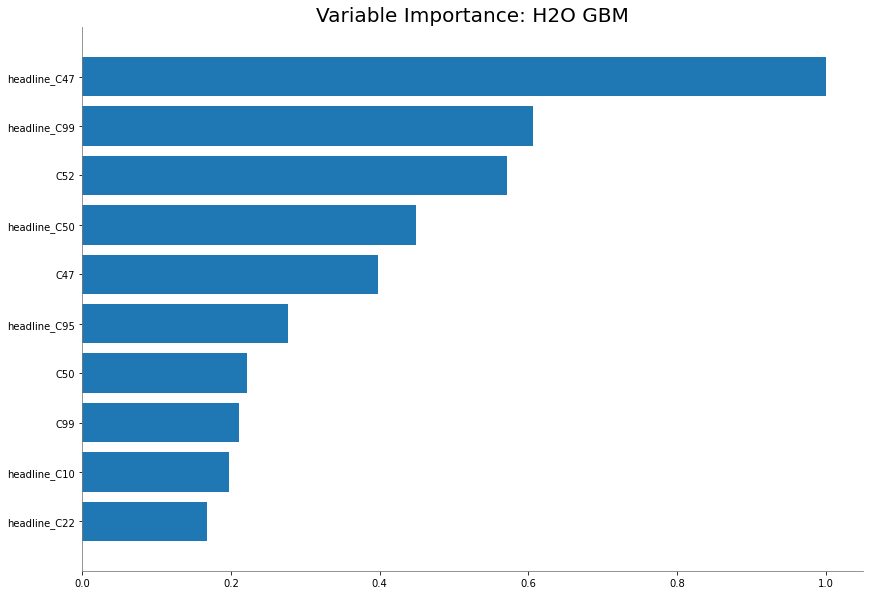

In [59]:
gbm_all_cols.varimp_plot()

In [61]:
gbm_hyperparameters = H2OGradientBoostingEstimator(ntrees=100,max_depth=6,learn_rate=0.1)

In [64]:
gbm_hyperparameters.train(x=headlines_vecs.names+reviews_vecs.names,y='target',training_frame=h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [65]:
print("Hyperparameter AUC : " + str(round(gbm_hyperparameters.auc(valid=True),3)))

Hyperparameter AUC : 0.933


In [66]:
gbm_hyperparameters.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5048280096700644: 


,,0,1,Error,Rate
0,0,3208.0,1476.0,0.3151,(1476.0/4684.0)
1,1,644.0,11921.0,0.0513,(644.0/12565.0)
2,Total,3852.0,13397.0,0.1229,(2120.0/17249.0)


In [67]:
gbm_hyperparameters.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-23 19:53:59,0.016 sec,0.0,0.445346,0.585923,0.500000,0.727303,1.000000,0.272697,0.444762,0.584800,0.500000,0.728448,1.000000,0.271552
1,,2020-07-23 19:54:00,1.213 sec,1.0,0.429977,0.553094,0.848637,0.931522,1.356667,0.184819,0.430326,0.553911,0.836618,0.926325,1.350751,0.192881
2,,2020-07-23 19:54:02,2.408 sec,2.0,0.416881,0.526950,0.865522,0.941286,1.372997,0.175682,0.417919,0.529019,0.853285,0.935583,1.368577,0.184880
3,,2020-07-23 19:54:03,3.439 sec,3.0,0.405770,0.505543,0.872490,0.944595,1.373328,0.172467,0.407458,0.508690,0.860938,0.939787,1.370637,0.183663
4,,2020-07-23 19:54:07,8.275 sec,8.0,0.365710,0.430568,0.897371,0.955763,1.374942,0.151123,0.370814,0.438960,0.883348,0.950162,1.372782,0.165285
5,,2020-07-23 19:54:12,13.117 sec,13.0,0.342911,0.387131,0.910200,0.961620,1.374942,0.142321,0.350691,0.399443,0.895044,0.955452,1.372782,0.154444
6,,2020-07-23 19:54:16,17.144 sec,17.0,0.330104,0.362466,0.918354,0.965319,1.374942,0.134639,0.340133,0.378091,0.902023,0.958660,1.372782,0.151429
7,,2020-07-23 19:54:21,22.047 sec,22.0,0.318056,0.338928,0.926763,0.969129,1.374942,0.126331,0.331047,0.358924,0.908503,0.961665,1.372782,0.144878
8,,2020-07-23 19:54:26,26.945 sec,27.0,0.309020,0.321463,0.932546,0.971644,1.374942,0.120861,0.324609,0.345316,0.912899,0.963559,1.372782,0.141689
9,,2020-07-23 19:54:30,31.100 sec,31.0,0.302821,0.309597,0.936782,0.973507,1.374942,0.118096,0.320498,0.336461,0.915910,0.964932,1.372782,0.139312


In [70]:
xgb_all_feat=H2OXGBoostEstimator(ntrees=100,learn_rate=0.1,max_leaves=6,tree_method="hist",grow_policy="lossguide")

In [71]:
xgb_all_feat.train(x=headlines_vecs.names+reviews_vecs.names,y='target',training_frame=h2o_train, validation_frame=h2o_valid)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [72]:
print("XGBoost AUC : " + str(round(xgb_all_feat.auc(valid=True),3)))

XGBoost AUC : 0.92


In [73]:
xgb_all_feat.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5421013385057449: 


,,0,1,Error,Rate
0,0,3067.0,1617.0,0.3452,(1617.0/4684.0)
1,1,732.0,11833.0,0.0583,(732.0/12565.0)
2,Total,3799.0,13450.0,0.1362,(2349.0/17249.0)


In [74]:
xgb_all_feat.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-23 19:57:31,0.243 sec,0.0,0.500000,0.693147,0.500000,0.727303,1.000000,0.272697,0.500000,0.693147,0.500000,0.728448,1.000000,0.271552
1,,2020-07-23 19:57:35,3.995 sec,1.0,0.481500,0.656770,0.761580,0.863690,1.211053,0.233981,0.481740,0.657234,0.754586,0.860348,1.203854,0.237173
2,,2020-07-23 19:57:36,4.669 sec,2.0,0.465774,0.626643,0.789797,0.887245,1.258812,0.230184,0.466132,0.627313,0.784390,0.884673,1.252917,0.233753
3,,2020-07-23 19:57:36,5.270 sec,3.0,0.452608,0.601780,0.793604,0.888262,1.258812,0.219243,0.453258,0.602971,0.786712,0.885106,1.252917,0.223027
4,,2020-07-23 19:57:41,9.658 sec,45.0,0.333506,0.362604,0.905948,0.960021,1.374942,0.148810,0.337480,0.368767,0.900797,0.958170,1.372782,0.151081
5,,2020-07-23 19:57:45,13.722 sec,83.0,0.313405,0.321441,0.922637,0.967576,1.374942,0.133824,0.319215,0.330380,0.916676,0.965441,1.372782,0.137457
6,,2020-07-23 19:57:47,16.095 sec,100.0,0.307977,0.310550,0.926903,0.969468,1.374942,0.130274,0.314885,0.321249,0.919941,0.966870,1.372782,0.136182


In [75]:
h2o_train,h2o_valid, h2o_test = h2o_df_ext.split_frame(ratios=[0.7,0.15])

In [76]:
gbm_final = H2OGradientBoostingEstimator(ntrees=200,max_depth=6,learn_rate=0.1)

In [77]:
gbm_final.train(x=headlines_vecs.names+reviews_vecs.names,y='target',training_frame=h2o_train, validation_frame=h2o_valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [78]:
print("XGBoost AUC : " + str(round(gbm_final.auc(valid=True),3)))

XGBoost AUC : 0.937


In [79]:
gbm_final.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46717291239821385: 


,,0,1,Error,Rate
0,0,2514.0,1100.0,0.3044,(1100.0/3614.0)
1,1,452.0,9031.0,0.0477,(452.0/9483.0)
2,Total,2966.0,10131.0,0.1185,(1552.0/13097.0)


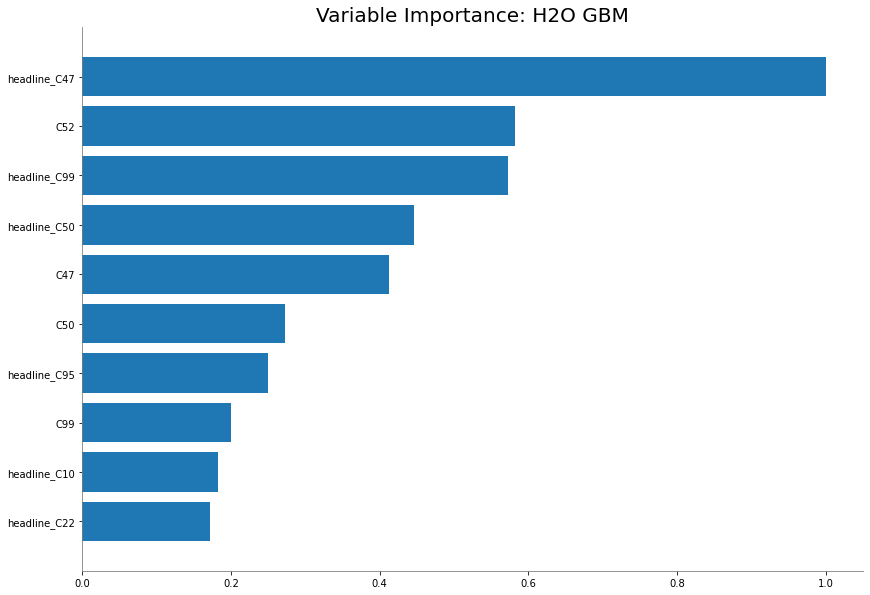

In [80]:
gbm_final.varimp_plot()

In [84]:
ntrees_opt=[100,200,250,300]
max_dept_opt=[0,7,8]
learn_rate_opt=[0.01,0.1]

In [90]:
hyper_parameters={"ntrees":ntrees_opt,"max_depth":max_dept_opt,"learn_rate":learn_rate_opt}
search_criteria={"strategy":"RandomDiscrete","max_models":4}

In [91]:
from h2o.grid.grid_search import H2OGridSearch
gs = H2OGridSearch(H2OGradientBoostingEstimator,hyper_params=hyper_parameters,search_criteria=search_criteria) 

In [ ]:
gs.train(x=headlines_vecs.names+reviews_vecs.names,y='target',training_frame=h2o_train, validation_frame=h2o_valid)

gbm Grid Build progress: |████████████

In [ ]:
print(gs.get_grid(sort_by='auc', decreasing=True))

In [ ]:
gs.models[0]